# Checking Your Machine Learning Results

There's a lot of different techniques for machine learning, only a few of which we will learn. Both the technique and the features you select can affect the accuracy of your results.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
sns.set_style("whitegrid")

In [8]:
%matplotlib inline

## Overfitting and underfitting

_Overfitting_ is when your model predicts your training data very well, but performs less well on new data. This can happen when you use too many polynomial degrees in linear regression, or when you add too many features into your feature vectors, skewing the model toward information in your training data that doesn't reflect general trends.

_Underfitting_ is when your model doesn't predict your training data well.

Here is an example of underfit and overfit with the ATUS sleeping data. We're using linear regression (because we've covered it) and polynomial degrees (because multiple features are hard to graph.)

In [9]:
summary = pd.read_csv("atussum_2013.dat")

sleep_data = summary[['TUFINLWGT', 'TEAGE', 'TESEX', 't010101']]
sleep_data = sleep_data.rename(columns={"TUFINLWGT": "weight", "TEAGE": "age", "TESEX": "sex", "t010101": "minutes"})
sleep_data['weighted_minutes'] = sleep_data.weight * sleep_data.minutes

sleep_by_age = sleep_data.groupby("age").sum()
sleep_by_age['mean_minutes'] = sleep_by_age.weighted_minutes / sleep_by_age.weight

X = np.array(sleep_by_age.index.values).reshape((-1, 1))
y = sleep_by_age.mean_minutes.values

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=101)

### Cross-validation

Note the last line of the above code. We're using a function from scikit-learn to split our data into two sections. A random selection of two-thirds of the data will be used for training. We'll keep the other one-third for testing later. This is a useful technique to test your model without new data.

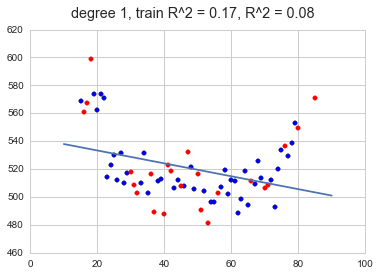

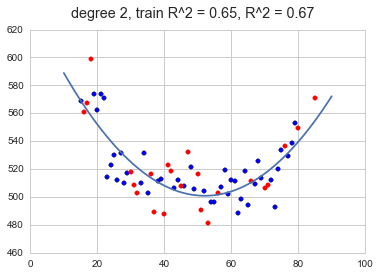

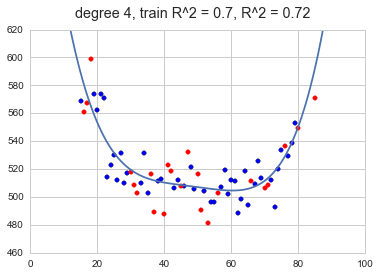

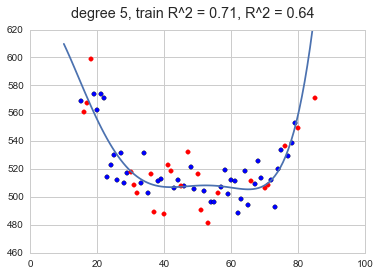

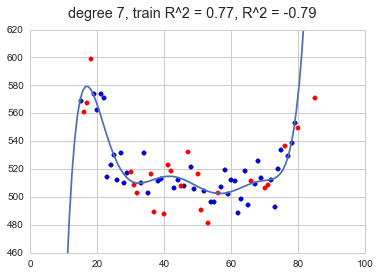

In [56]:
for degree in [1, 2, 4, 5, 7]:
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                      ('linear', LinearRegression())])
    model = model.fit(train_X, train_y)
    fn = lambda x: model.predict(x)[0]
    plt.scatter(train_X, train_y)
    plt.scatter(test_X, test_y, color='r')
    xmin, xmax = plt.xlim()
    xs = np.linspace(xmin, xmax, 100)
    plt.suptitle("degree {}, train R^2 = {}, R^2 = {}".format(degree, 
                                                              model.score(train_X, train_y).round(2),
                                                              model.score(X, y).round(2)),
                size='x-large')
    plt.ylim(ymax=620)
    plt.plot(xs, [fn(x) for x in xs])
    plt.show()

As we increased in degree, the function changed to fit the training data better and better, but the overall fit got much worse after degree 4. Note the weird highs and lows in the middle of the last two graphs.

### Score

All scikit-learn models have a `.score` method. Not all use $R^2$ for the result, but they all can be used to find the accuracy of your model.

## Bias and variance

[Understanding the Bias-Variance Tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html)

If your model has high bias -- it performs poorly even on training data -- try adding more features.

If your model has high variance, get more data if possible. If not, try removing features.